In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
import pandas as pd

# Evaluating the integral without using weight function

## -> inputs(nsamples) returns an array of length nsamples using random sampling from a uniform distribution between 0 and 1

In [3]:
def function(x):
    return(1/(1+x**2))
def inputs(nsamples):
    x=[]
    for i in range(nsamples):
        x.append(np.random.uniform(0,1))
    return(x)
    

## crude_mc is the monte carlo function to find integral value given input number of sample points to be taken

In [4]:
def crude_mc(nsamples):
    x=inputs(nsamples)
    sumval=0
    for i in range(nsamples):
        sumval+=function(x[i])
    return(sumval/nsamples)
        

In [5]:
crude_mc(10)

0.8254982117318841

In [6]:
crude_mc(1000)

0.7765310655254598

In [7]:
def sigma_i(nsamples):
    squareval=0
    x=inputs(nsamples)
    for i in range(nsamples):
        squareval+=function(x[i])**2
    avgsqval=squareval/nsamples
    
    ## square of avg
    
    sqofavg=crude_mc(nsamples)**2
    
    return(abs(((avgsqval-sqofavg)/nsamples)**0.5))

In [8]:
N=[i for i in range(10,10000,500)]
sigma_crude=[]
integral_crude=[]


In [9]:
for i in range(len(N)):
    integral_crude.append(crude_mc(N[i]))
    sigma_crude.append(sigma_i(N[i]))

In [10]:
data=pd.DataFrame()
data["N"]=N
data["crude_integral"]=integral_crude
data["crude_sigma"]=sigma_crude

In [11]:
data

,N,crude_integral,crude_sigma
0,10,0.777553,0.074935
1,510,0.784049,0.010134
2,1010,0.785640,0.004231
3,1510,0.789741,0.005006
4,2010,0.788021,0.004263
5,2510,0.784397,0.002336
6,3010,0.782474,0.003346
7,3510,0.781922,0.003012
8,4010,0.784187,0.001977
9,4510,0.787775,0.002553


# Evaluating the integral using a weight function

In [12]:
def weight_function(x):
    return ((4-2*x)/3)

In [13]:
def xasfunctionofy(y):
    return(float(2-math.sqrt(4-3*y)))

In [14]:
def weighted_mc(nsamples):
    y=inputs(nsamples)
    x=list(map(xasfunctionofy,y))
    sumval=0
    for i in range(nsamples):
        sumval+=float(function(x[i])/weight_function(x[i]))
    return(sumval/nsamples)

In [15]:
weighted_mc(1000)

0.785590382293762

In [16]:
def weighted_sigma(nsamples):
    squareval=0
    y=inputs(nsamples)
    x=list(map(xasfunctionofy,y))
    for i in range(nsamples):
        squareval+=(function(x[i])/weight_function(x[i]))**2
    avgsqval=squareval/nsamples
    
    ## square of avg
    
    sqofavg=weighted_mc(nsamples)**2
    
    return(abs(((avgsqval-sqofavg)/nsamples)**0.5))
    

In [17]:
integral_weighted=[]
sigma_weighted=[]

for i in range(len(N)):
    integral_weighted.append(weighted_mc(N[i]))
    sigma_weighted.append(weighted_sigma(N[i]))

In [18]:
data["weighted_integral"]=integral_weighted
data["weighted_sigma"]=sigma_weighted

## Reproducing the table as given in class

In [19]:
data

,N,crude_integral,crude_sigma,weighted_integral,weighted_sigma
0,10,0.777553,0.074935,0.780348,0.036821
1,510,0.784049,0.010134,0.785688,0.001995
2,1010,0.785640,0.004231,0.785625,0.001626
3,1510,0.789741,0.005006,0.785121,0.001191
4,2010,0.788021,0.004263,0.785487,0.000470
5,2510,0.784397,0.002336,0.785065,0.000787
6,3010,0.782474,0.003346,0.785422,0.000349
7,3510,0.781922,0.003012,0.785358,0.000413
8,4010,0.784187,0.001977,0.785716,0.000374
9,4510,0.787775,0.002553,0.784828,0.000335


## Plot of sigma vs N

The unweighted sigma value is initially large compared to the weighted sigma value, but eventually both diminish to zero for large N

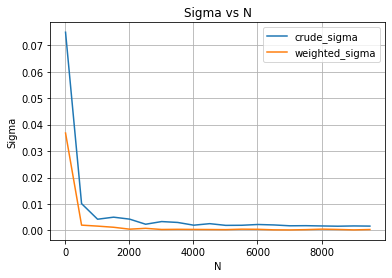

In [23]:
plt.figure(1)
plt.plot(N,sigma_crude,label="crude_sigma")
plt.plot(N,sigma_weighted,label="weighted_sigma")
plt.title("Sigma vs N")
plt.legend(loc="upper right")
plt.xlabel('N')
plt.ylabel("Sigma")
plt.grid()
plt.show()


## Plot of integral value vs N
The unweighted integral values show a large variance around the pi/4 value, however, the variance is very low for weigted integral values

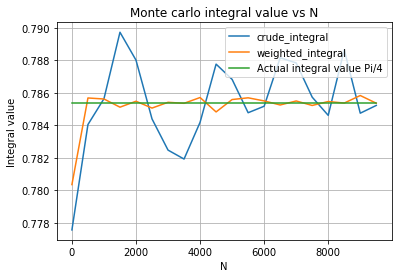

In [28]:
plt.figure(2)
plt.plot(N,integral_crude,label="crude_integral")
plt.plot(N,integral_weighted,label="weighted_integral")
plt.plot(N,[math.pi/4 for i in range(len(N))],label="Actual integral value Pi/4")
plt.title("Monte carlo integral value vs N")
plt.xlabel("N")
plt.ylabel("Integral value")
plt.legend(loc="upper right")
plt.grid()
plt.show()